# Import Modules

In [1]:
import pandas as pd
import numpy as np

import utils

# Load Data

In [2]:
target_vegetable = "トマト"
training_size = 4000

In [3]:
train_test = pd.read_csv("./data/mapped_train_test.csv")
train_test["date"] = pd.to_datetime(train_test["date"], format="%Y-%m-%d")
weather = pd.read_csv("./data/sorted_mapped_adjusted_weather.csv")
train_test = pd.concat([train_test, weather], axis=1)

train_test["year"] = train_test.date.dt.year
years = pd.get_dummies(train_test["year"])
train_test = train_test.drop(columns="year")
train_test = pd.concat([train_test, years], axis=1)

train_test["month"] = train_test.date.dt.month
months = pd.get_dummies(train_test["month"])
train_test = train_test.drop(columns="month")
train_test = pd.concat([train_test, months], axis=1)

# train_test["weekday"] = train_test.date.dt.weekday
# weekdays = pd.get_dummies(train_test["weekday"])
# train_test = train_test.drop(columns="weekday")
# train_test = pd.concat([train_test, weekdays], axis=1)

areas = pd.get_dummies(train_test["area"])
train_test = train_test.drop(columns="area")
train_test = pd.concat([train_test, areas], axis=1)

train = train_test[:pd.read_csv("./data/train.csv").shape[0]]

target_values = utils.get_target_values(train, target_vegetable)
changed_col = [1, 0] + [i for i in np.arange(2, target_values.shape[1])]
target_values = target_values[:, changed_col]
train_loader, test_y, train, test, ss = utils.preprocess_data(target_values, train_size=training_size)

# Set Free Params

In [4]:
future = test.shape[0]
num_epochs = 200
learning_rate = 0.001
weight_decay = 1e-3
patience = 30

# Training

early stop at: 0.3398936092853546


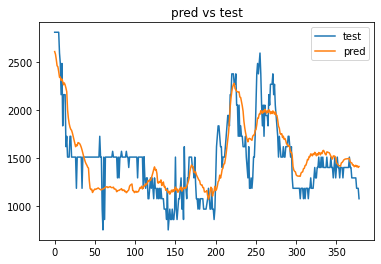

In [5]:
pred_y, _ = utils.pipeline_rnn(train_loader, train, test, test_y, future=future,
                               num_epochs=num_epochs, lr=learning_rate, weight_decay=weight_decay, patience=patience)

pred_y = pred_y.cpu().detach().numpy()
pred = np.concatenate([pred_y.reshape(-1, 1), test[:, 1:]], axis=1)

utils.plot_prediction(pred, test, ss)

# Terminal Score

In [ ]:
utils.get_terminal_score()